# Análisis Exploratorio de Datos ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest


**Cargo el dataset como DataFrame**


In [50]:
train_data = pd.read_csv("../data/raw/internal-link.csv")
df = pd.concat([train_data]).reset_index(inplace=False)
df.drop(columns=["index"], inplace=True)

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**Comenzamos a ver que tipo de (Dtype) temos**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [52]:
df.shape

(48895, 16)

In [53]:
df = df.loc[df['price'] > 0]  # Elimino precios de 0


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.00000,9.470548e+06,1.967574e+07,2.915297e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.00000,7.817310e+06,3.079257e+07,1.074344e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.49979,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.24442,-7.398308e+01,-7.395569e+01,-7.393629e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48884.0,2.327199e+01,4.455133e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38833.0,1.373128e+00,1.680391e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48884.0,7.144628e+00,3.295619e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48884.0,1.127795e+02,1.316273e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Observaciones:

>
> - Existen 48895 filas (Clientes) 16 Columnas con información: nombre, precio por noche, lugar, tipo de airbnb, etc...
> - La variable reviews_per_month contiene 38843 valores, por lo cual tiene menos 10000 valores (Reviews) 


## Limpieza de Datos

EDA


In [55]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) 

df.dropna(inplace=True) #Elimino los valores nulos/NaN

/tmp/ipykernel_1794/3408405083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_1794/3408405083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True) #Elimino los valores nulos/NaN


In [56]:
df.duplicated() #Reviso si hay valores duplicados

0        False
1        False
3        False
4        False
5        False
         ...  
48782    False
48790    False
48799    False
48805    False
48852    False
Length: 38811, dtype: bool

## Elimino las variables irrelevantes

In [57]:
df.drop(['name','id','host_id','last_review','host_name'], axis=1, inplace=True)
df.head()

/tmp/ipykernel_1794/937296048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['name','id','host_id','last_review','host_name'], axis=1, inplace=True)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


## Análisis de Variables


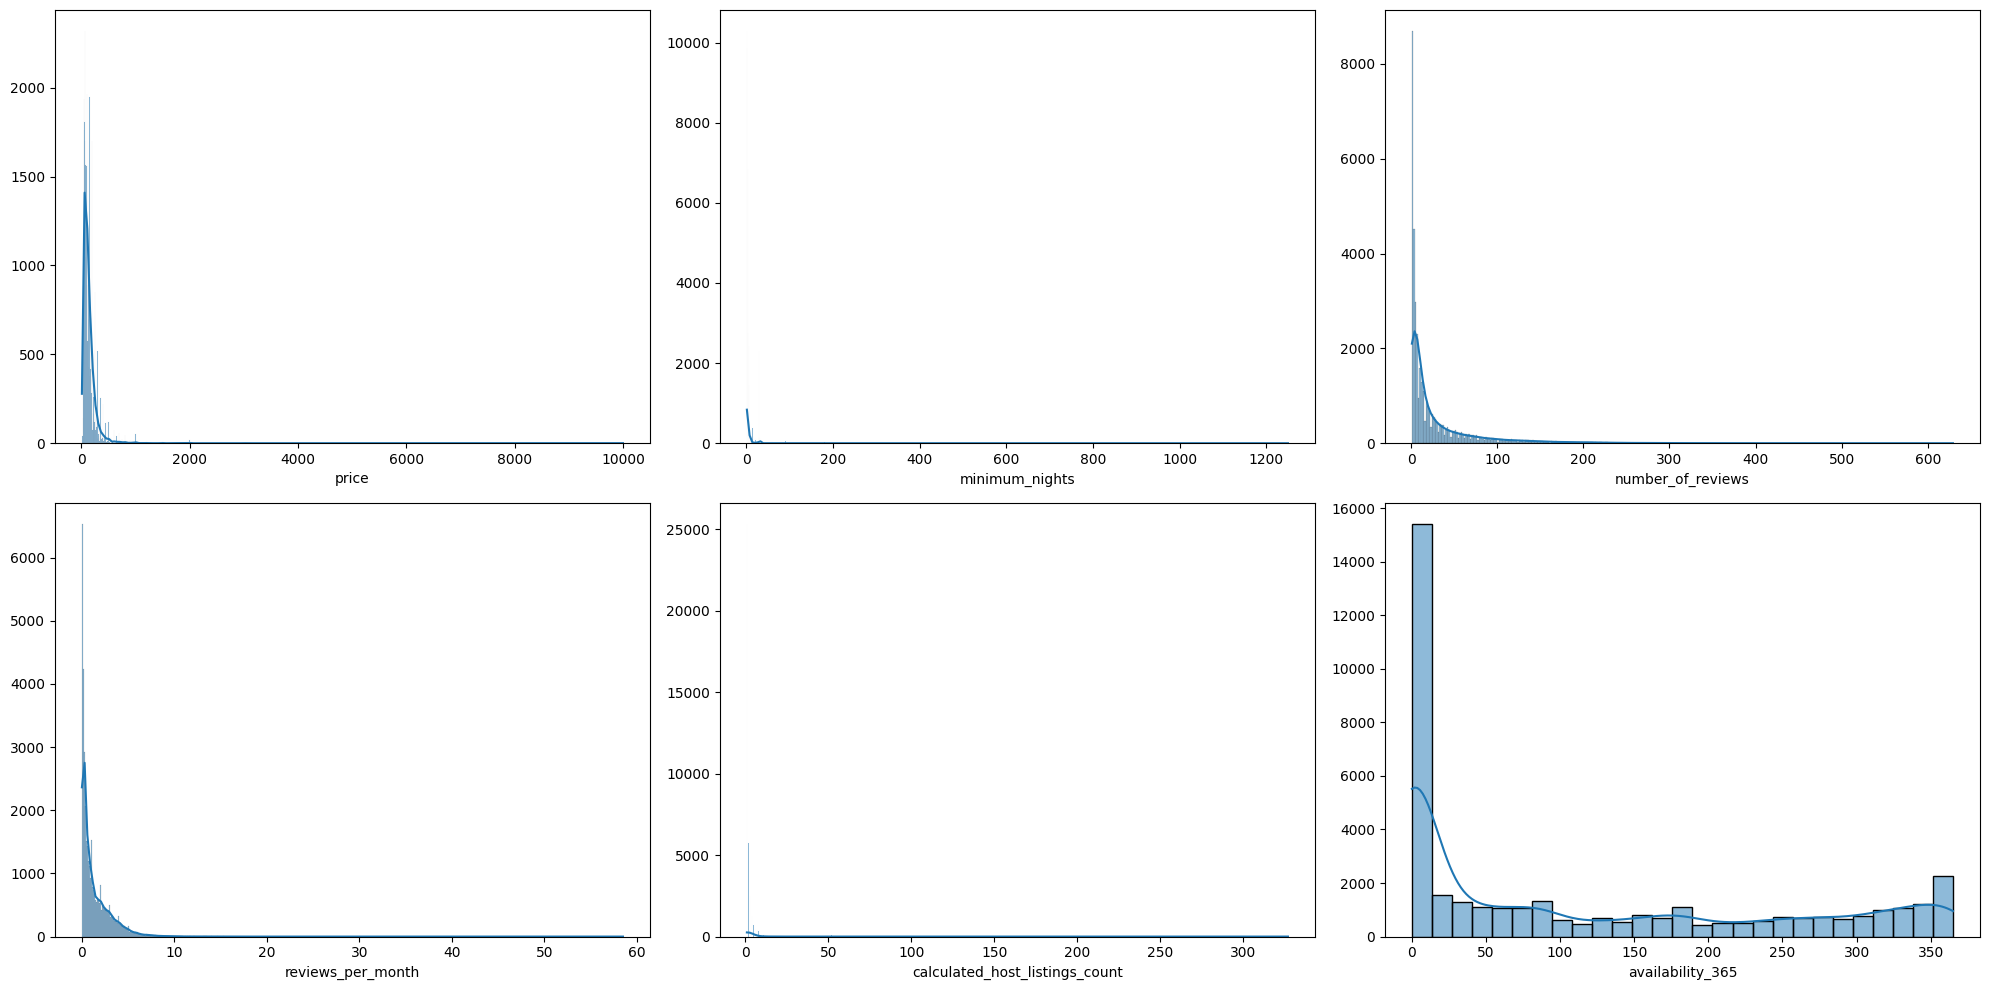

In [58]:
figs, axis = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(ax=axis[0, 0], data=df, x='price', kde=True).set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=df, x='minimum_nights', kde=True).set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x='number_of_reviews', kde=True).set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x='reviews_per_month', kde=True).set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x='calculated_host_listings_count', kde=True).set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x='availability_365', kde=True).set(ylabel=None)

plt.tight_layout()
plt.show()

#### Análisis de Variables Univariante Numéricas


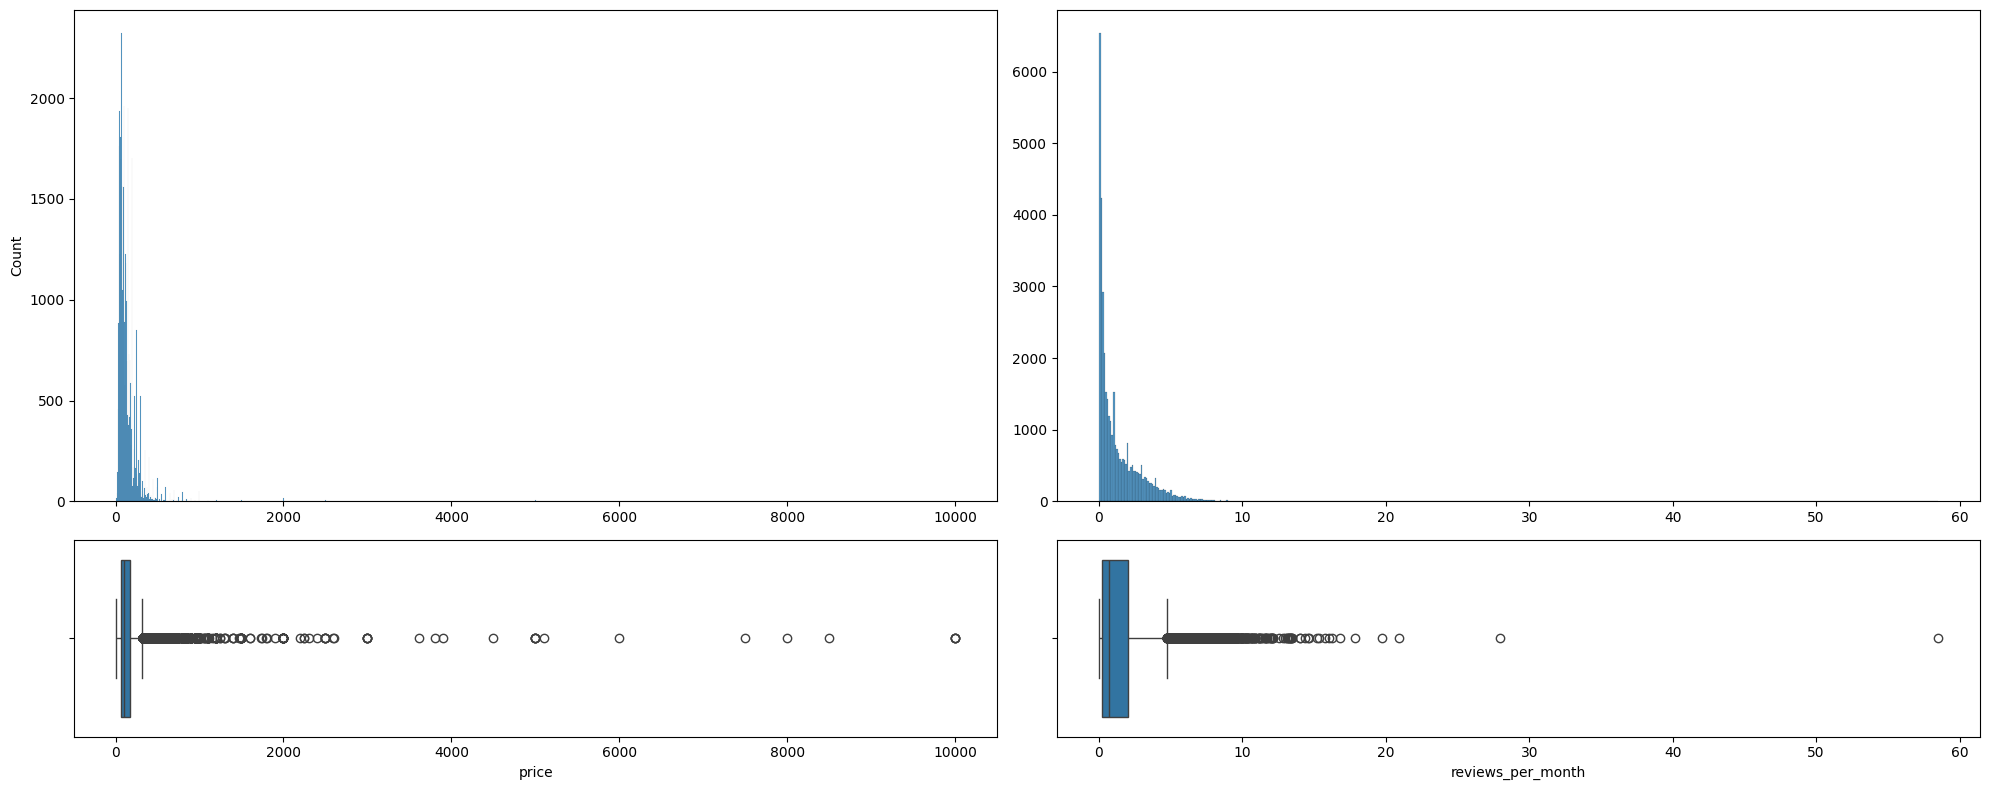

In [59]:
fig, axis = plt.subplots(2, 2, figsize=(20, 8), gridspec_kw={'height_ratios': [10, 4]})

sns.histplot(ax=axis[0, 0], data=df, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="price")
sns.histplot(ax=axis[0, 1], data=df, x="reviews_per_month").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="reviews_per_month")

plt.tight_layout()
plt.show()

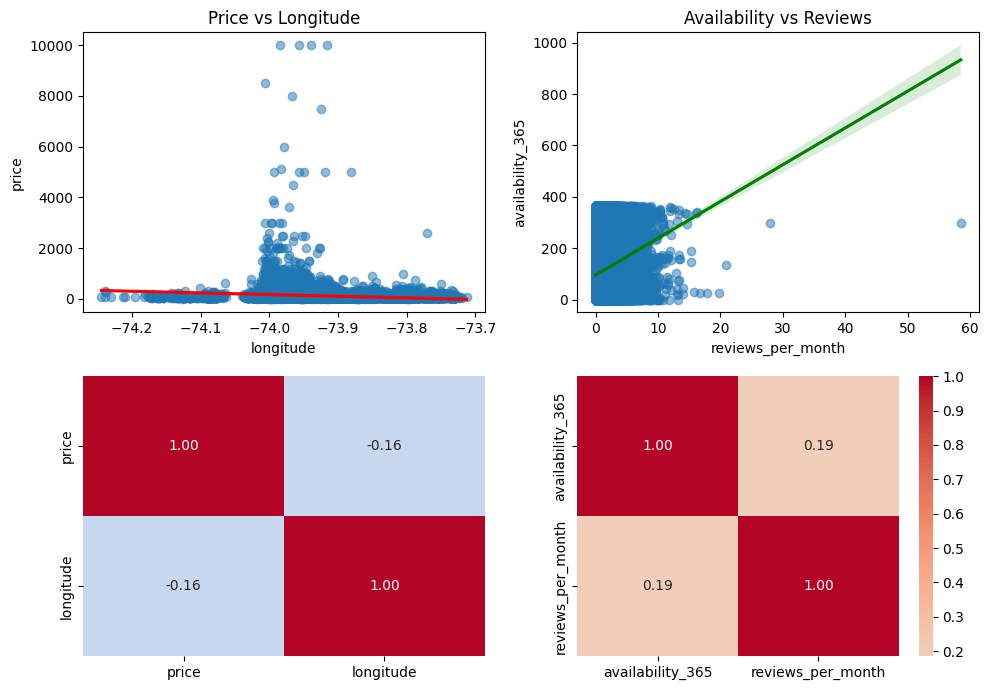

In [60]:
corr_price_longitude = df[['price', 'longitude']].corr()
corr_availability_reviews = df[['availability_365', 'reviews_per_month']].corr()

fig, axis = plt.subplots(2, 2, figsize=(10, 7))


sns.regplot(ax=axis[0, 0], data=df, x='longitude', y='price', 
            line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
axis[0, 0].set_title('Price vs Longitude')


sns.heatmap(ax=axis[1, 0], data=corr_price_longitude, annot=True, 
            fmt=".2f", cbar=False, cmap='coolwarm', center=0)


sns.regplot(ax=axis[0, 1], data=df, x='reviews_per_month', y='availability_365', 
            line_kws={'color': 'green'}, scatter_kws={'alpha': 0.5})
axis[0, 1].set_title('Availability vs Reviews')


sns.heatmap(ax=axis[1, 1], data=corr_availability_reviews, annot=True, 
            fmt=".2f", cmap='coolwarm', center=0)

plt.tight_layout()
plt.show()

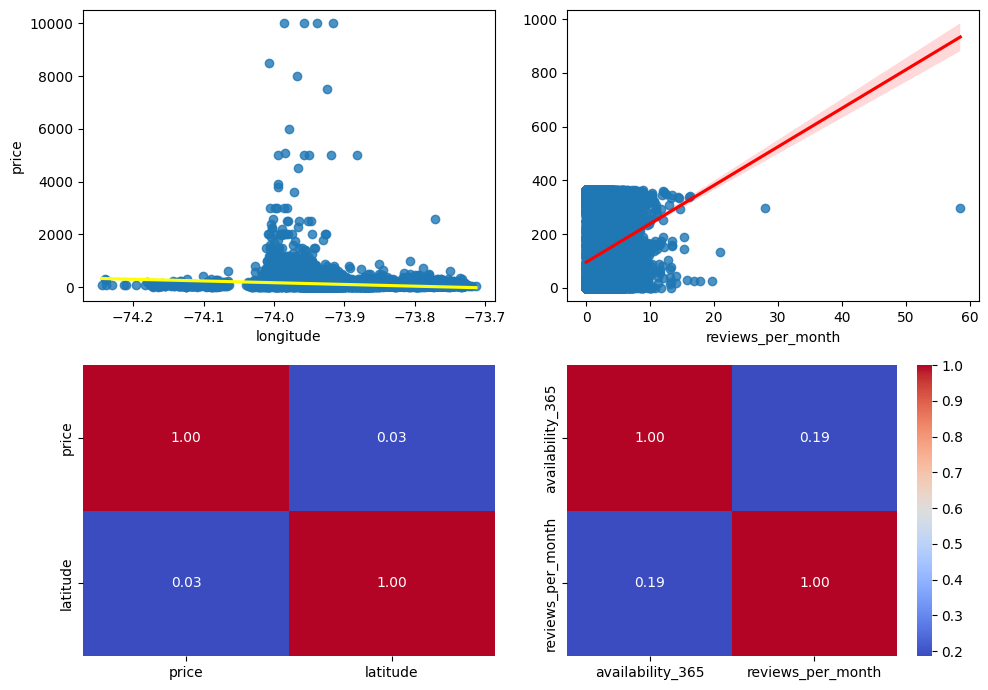

In [61]:
corr_price_longitude = df[['price', 'latitude']].corr()
corr_availability_reviews = df[['availability_365', 'reviews_per_month']].corr()

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x='longitude', y='price', line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_longitude, annot=True, fmt=".2f", cbar=False, cmap='coolwarm')

sns.regplot(ax=axis[0, 1], data=df, x='reviews_per_month', y='availability_365', line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_availability_reviews, annot=True, fmt=".2f", cmap='coolwarm')

plt.tight_layout()
plt.show()

## Generamos las correlaciones

**Obvservacion de la correlación**

>- Existe una relacion lineal entre el precio y la latitud (Aunque no muy directa).
>- Tambien disponibilidad y reseñas por noche tiene una relacion un poco mas cercana a 1

/tmp/ipykernel_1794/3491692742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='rainbow')


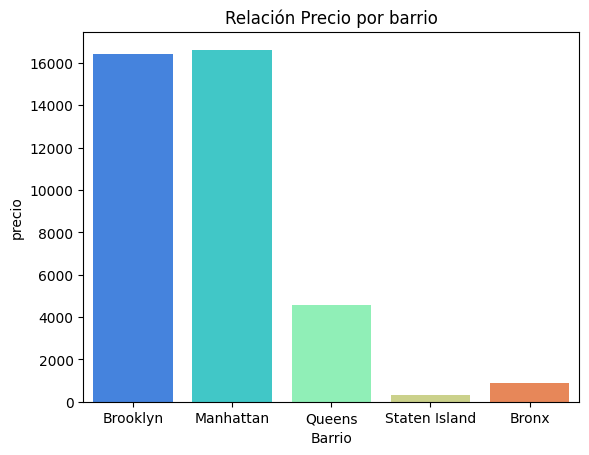

In [62]:
sns.countplot(data=df, x='neighbourhood_group', palette='rainbow')

plt.title('Relación Precio por barrio')
plt.xlabel('Barrio')
plt.ylabel('precio')
plt.show()

In [63]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000
mean,40.728134,-73.951157,142.369199,5.868723,29.288088,1.373135,5.166757,114.881631
std,0.054992,0.046695,197.006883,17.390315,48.184653,1.680276,26.306326,129.535406
min,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762995,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Observaciones

> - Ubicación importa: La longitud geográfica afecta los precios
> - Disponibilidad clave: Listings disponibles más días reciben más reviews
> - Precios mas bajos: Estadías mínimas cortas generan mayor interacción con los clientes

#### CORREALACION

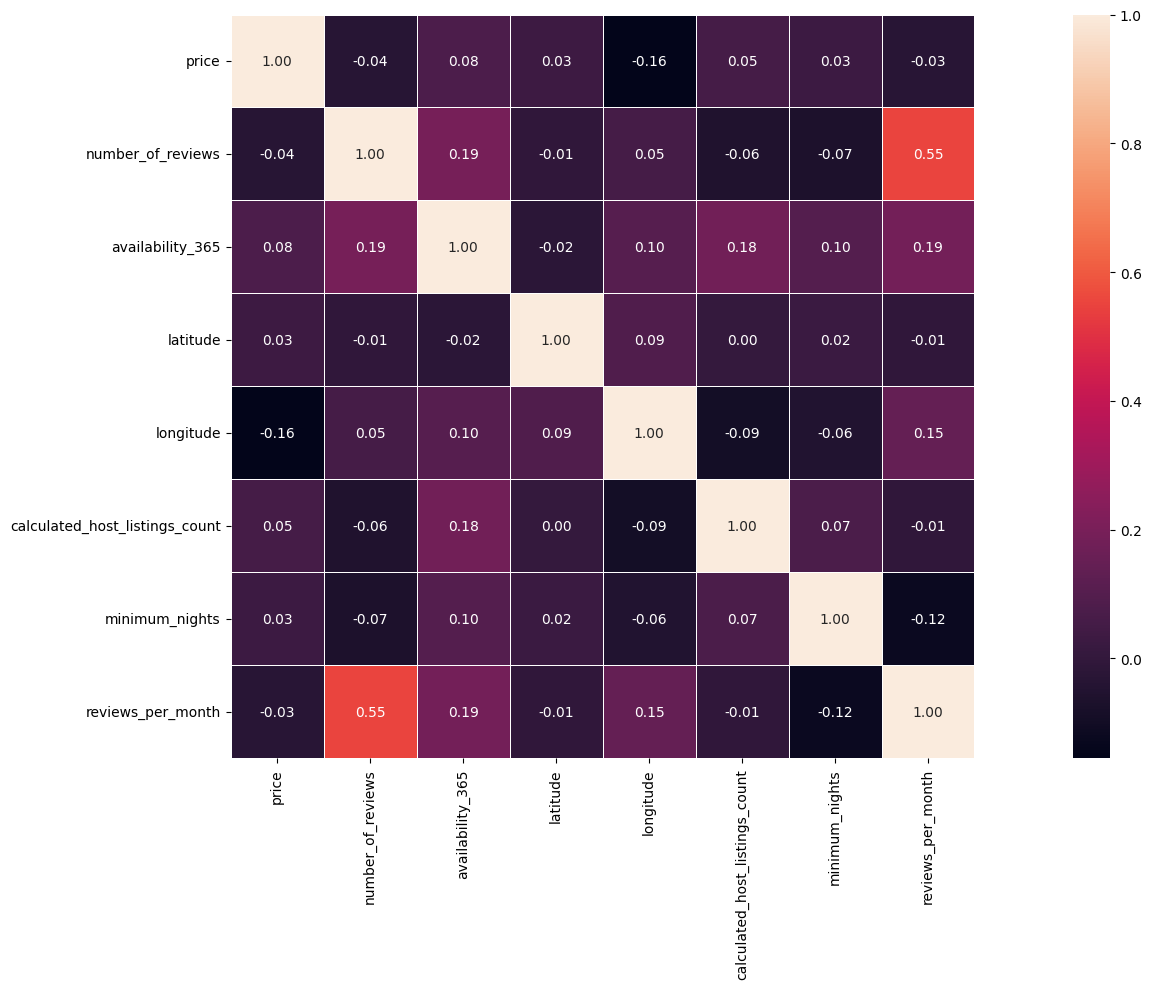

In [64]:
plt.figure(figsize=(20, 10))
correlacion = df[['price', 'number_of_reviews', 'availability_365', 'latitude', 'longitude', 'calculated_host_listings_count', 'minimum_nights', 'reviews_per_month']]
mask = np.triu(np.ones_like(correlacion, dtype=bool))

sns.heatmap(correlacion.corr(), annot=True, square=True, fmt=".2f", linewidths=0.5)

plt.tight_layout()
plt.show()

## Observaciones 

> - la ubicación geográfica como factor clave
> - Estadías mínimas cortas generan más interacción
> - Mayor disponibilidad tiende a tener más reseñas por lo cual lleva a más visibilidad

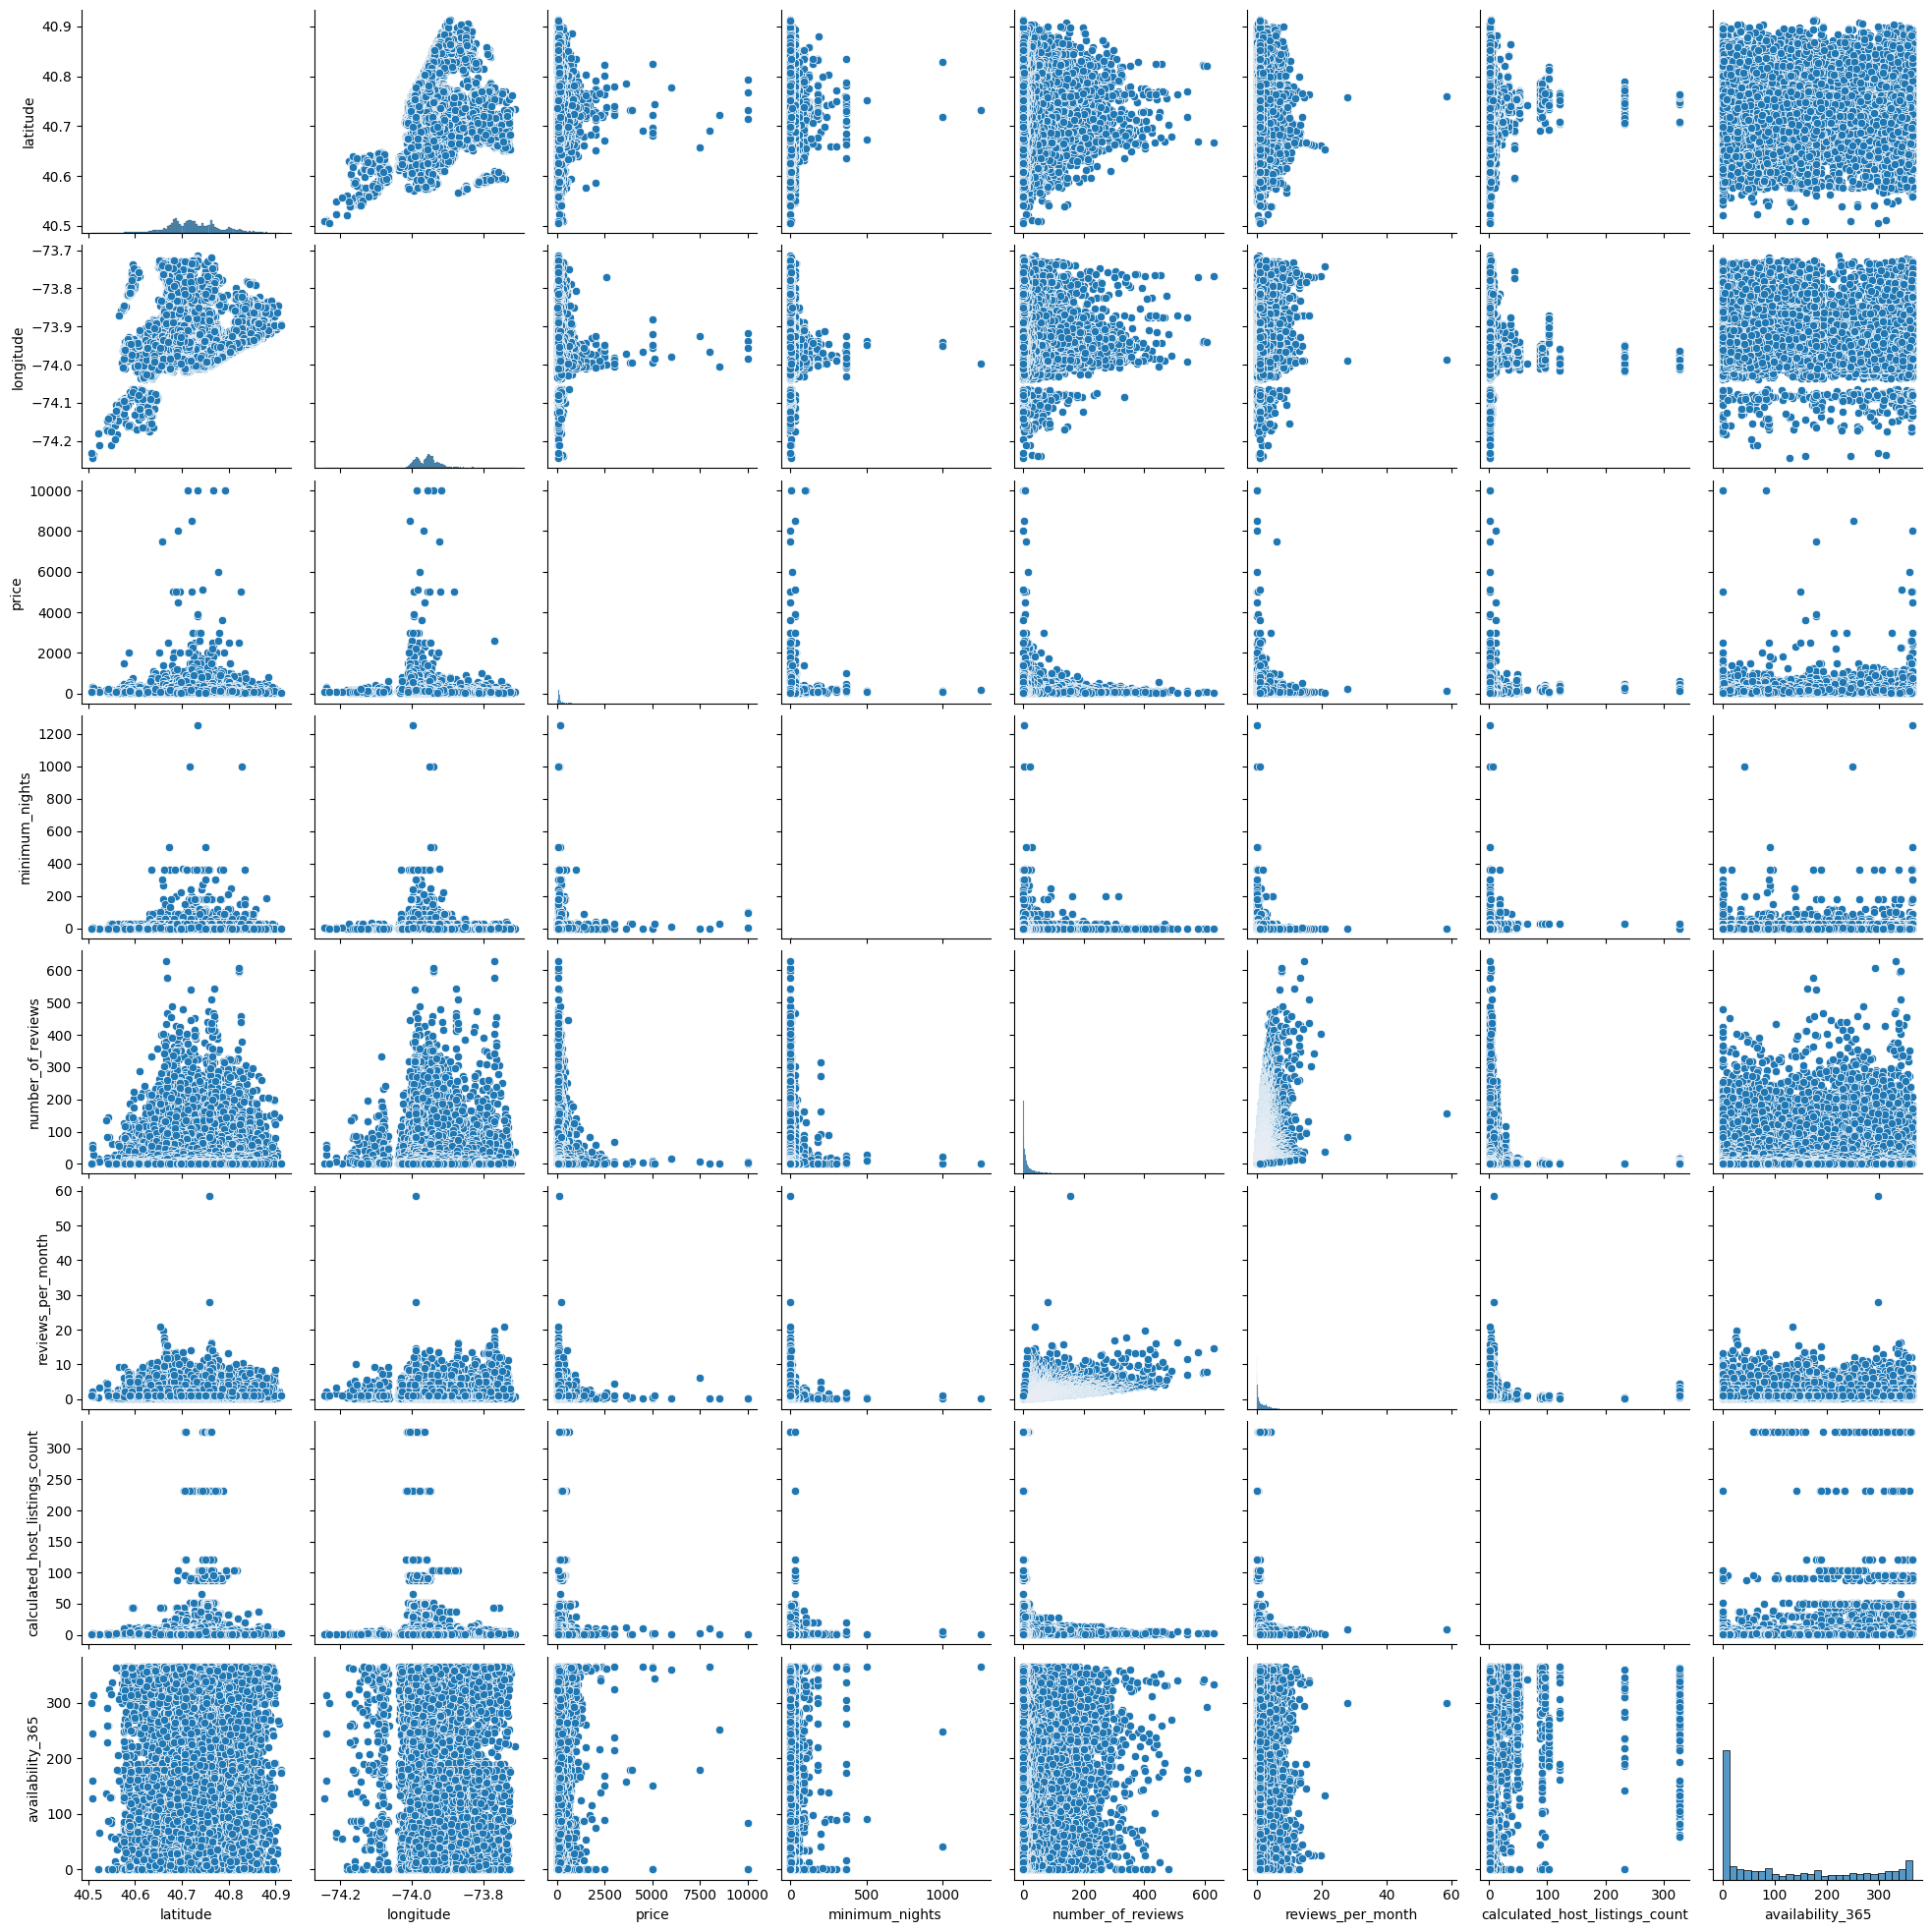

In [65]:
sns.pairplot(data=df)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,38811.0,40.728134,0.054992,40.50641,40.68864,40.72171,40.762995,40.91306
longitude,38811.0,-73.951157,0.046695,-74.24442,-73.98247,-73.95481,-73.935030,-73.71299
price,38811.0,142.369199,197.006883,10.00000,69.00000,101.00000,170.000000,10000.00000
minimum_nights,38811.0,5.868723,17.390315,1.00000,1.00000,2.00000,4.000000,1250.00000
number_of_reviews,38811.0,29.288088,48.184653,1.00000,3.00000,9.00000,33.000000,629.00000
reviews_per_month,38811.0,1.373135,1.680276,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,38811.0,5.166757,26.306326,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,38811.0,114.881631,129.535406,0.00000,0.00000,55.00000,229.000000,365.00000


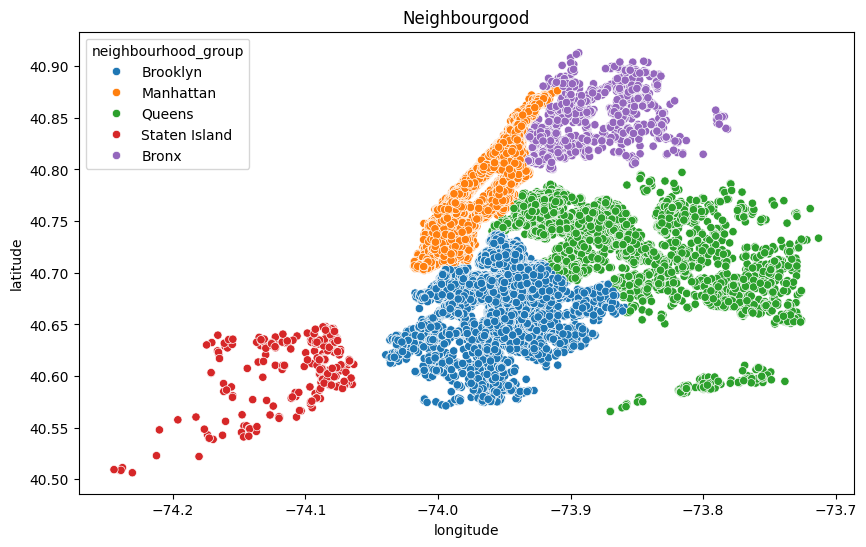

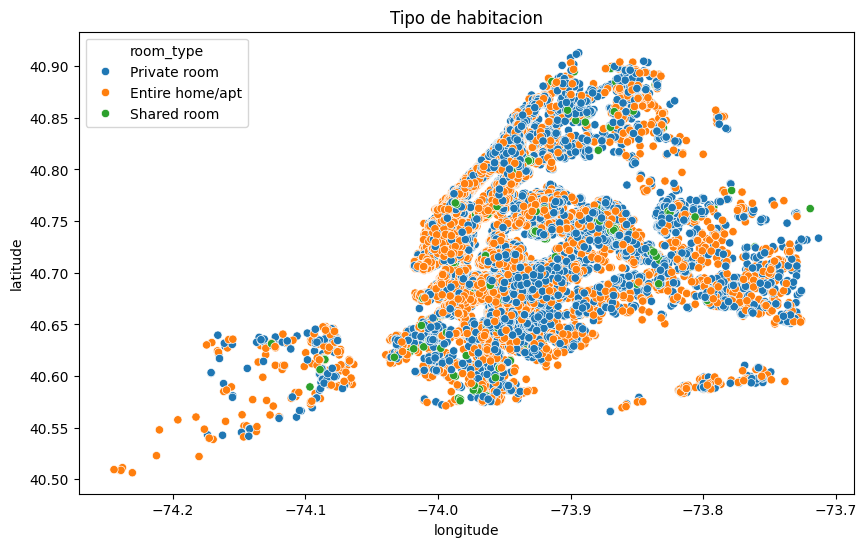

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.title('Neighbourgood')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df)
plt.title('Tipo de habitacion')
plt.show()

## Relacion de precio por tipo de habitacion

/tmp/ipykernel_1794/2011351833.py:1: FutureWarning: The provided callable <function median at 0x713430e36480> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')


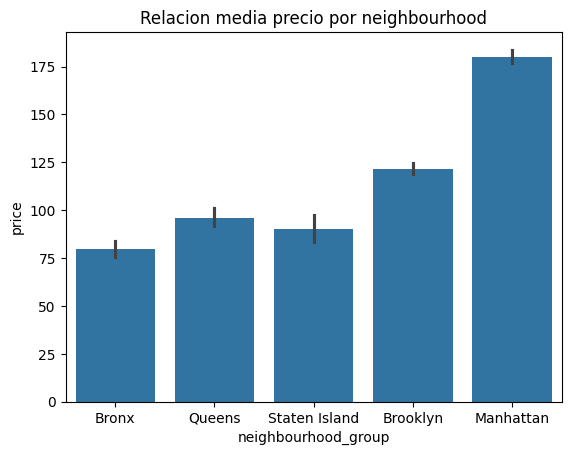

In [68]:
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')

sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group'])
plt.title('Relacion media precio por neighbourhood')
plt.show()

Precios en Manhattan son mas altos

## Análisis de outliers

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,38811.0,40.728134,0.054992,40.50641,40.68864,40.72171,40.762995,40.91306
longitude,38811.0,-73.951157,0.046695,-74.24442,-73.98247,-73.95481,-73.935030,-73.71299
price,38811.0,142.369199,197.006883,10.00000,69.00000,101.00000,170.000000,10000.00000
minimum_nights,38811.0,5.868723,17.390315,1.00000,1.00000,2.00000,4.000000,1250.00000
number_of_reviews,38811.0,29.288088,48.184653,1.00000,3.00000,9.00000,33.000000,629.00000
reviews_per_month,38811.0,1.373135,1.680276,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,38811.0,5.166757,26.306326,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,38811.0,114.881631,129.535406,0.00000,0.00000,55.00000,229.000000,365.00000


###Obvservaciones

> - Precios muy elevados de 10000
> - Algunos hosts tienen cantidades extremas de propiedades


**Outliers: Visualización**


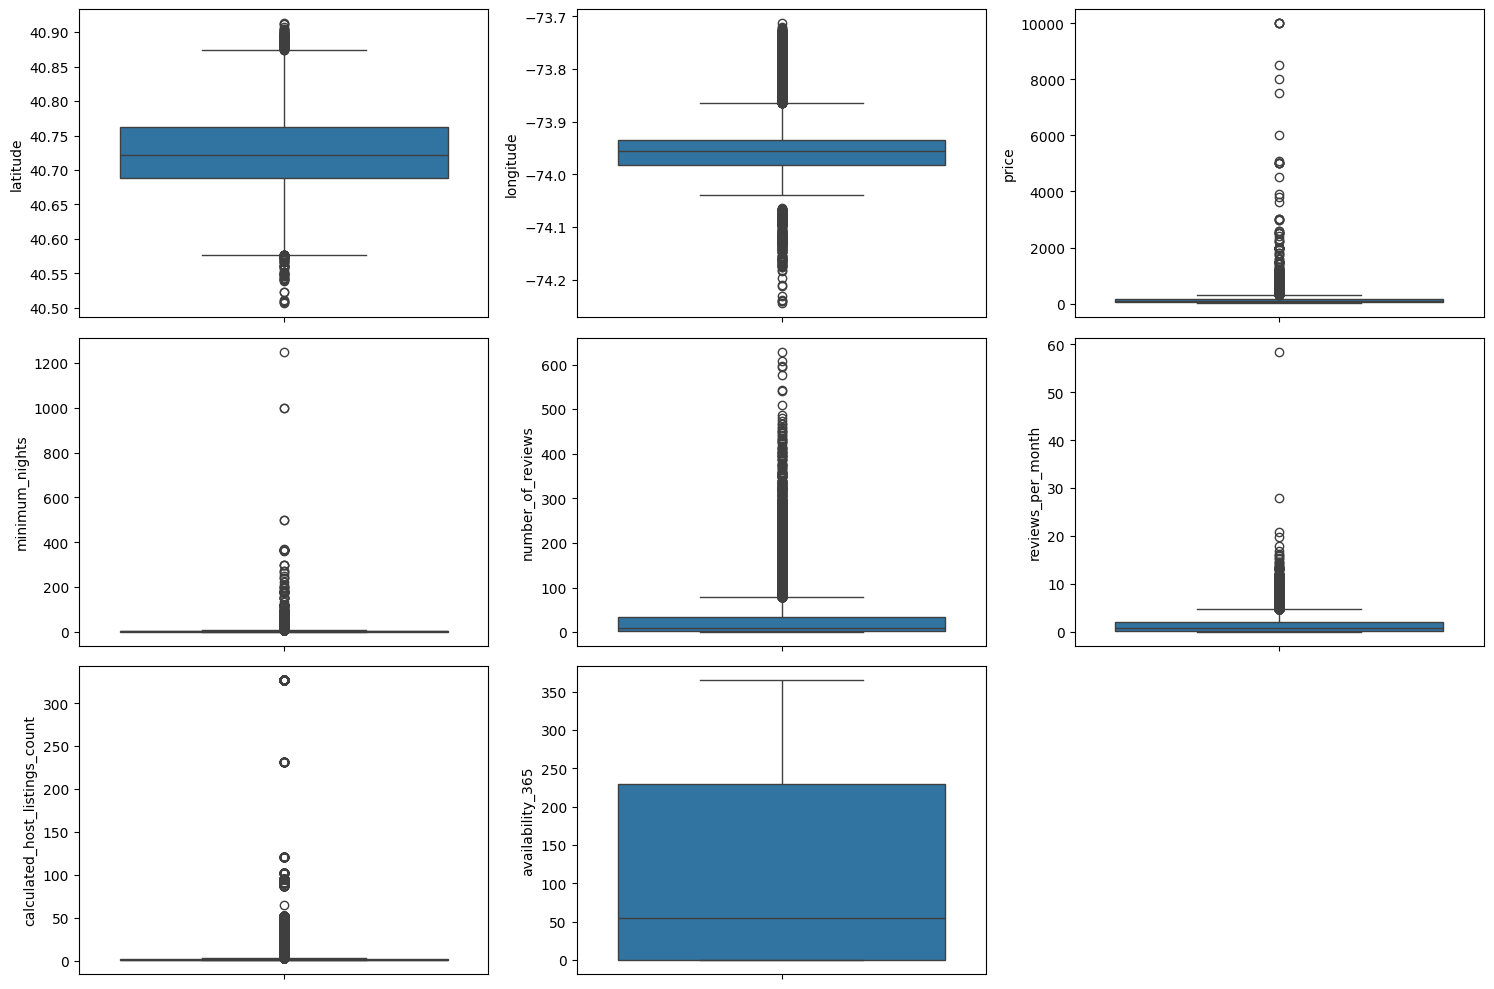

In [70]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="latitude")
sns.boxplot(ax=axis[0, 1], data=df, y="longitude")
sns.boxplot(ax=axis[0, 2], data=df, y="price")
sns.boxplot(ax=axis[1, 0], data=df, y="minimum_nights")
sns.boxplot(ax=axis[1, 1], data=df, y="number_of_reviews")
sns.boxplot(ax=axis[1, 2], data=df, y="reviews_per_month")
sns.boxplot(ax=axis[2, 0], data=df, y="calculated_host_listings_count")
sns.boxplot(ax=axis[2, 1], data=df, y="availability_365")
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

## Obvservaciones

Podemos determinar fácilmente que las variables afectadas por outliers son `calculated_host_listings_count`, `minimum_nights`, `reviews_per_month` y `Price`

In [71]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 321.5, límite inferior: 0, rango intercuartílico: 101.0'

In [72]:
df[df["price"] < 5000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...
48782,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1.00,1,147
48790,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.00,6,339
48799,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.00,1,87
48805,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.00,1,40


> - Filtro valores mas asequibles menores a 5k
> - rbnbs con al menos 1 reseña
> - Reseñas recientes
> -  Disponible al menos 1 mes al año
> - Estadias mas razonables

In [ ]:

df = df[
    (df["number_of_reviews"] >= 1) & 
    (df["reviews_per_month"] > 0.1) & 
    (df["availability_365"] >= 7) & 
    (df["minimum_nights"] <= 90)      
].copy()

df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
...,...,...,...,...,...,...,...,...,...,...,...
48701,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2.00,1,14
48782,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1.00,1,147
48790,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.00,6,339
48799,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.00,1,87


In [74]:
df.isnull()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
48782,False,False,False,False,False,False,False,False,False,False,False
48790,False,False,False,False,False,False,False,False,False,False,False
48799,False,False,False,False,False,False,False,False,False,False,False
48805,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.shape

(17606, 11)

In [76]:
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

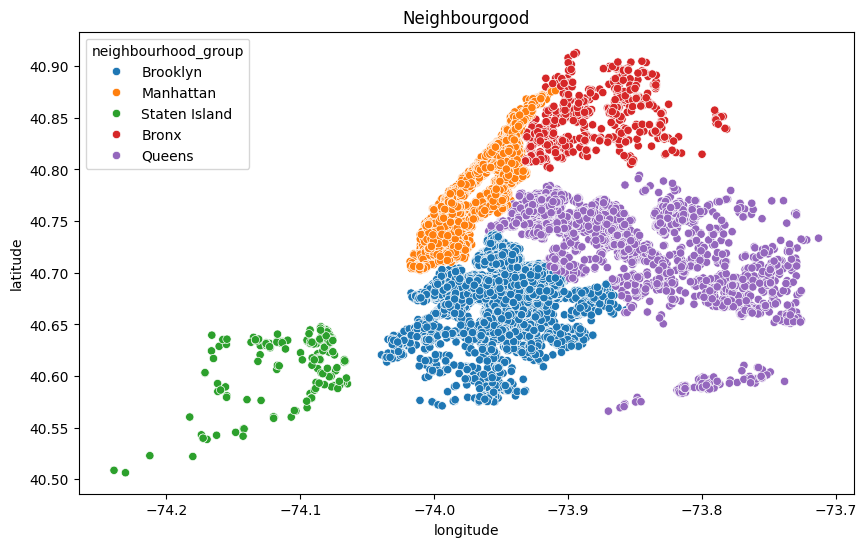

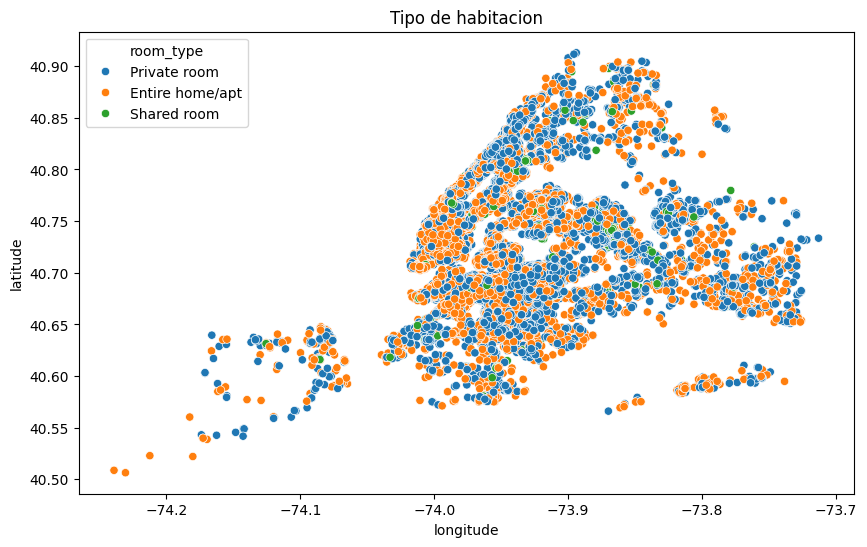

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.title('Neighbourgood')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df)
plt.title('Tipo de habitacion')
plt.show()

### Realizamos el split

In [89]:
X = df.drop(['price'], axis=1)  # Solo eliminar el target
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=18
)

In [79]:
X_train

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10167,Eastchester,40.88001,-73.83450,2,5,0.12,13,320
38986,Lower East Side,40.72068,-73.99019,2,1,0.16,3,0
7203,Greenpoint,40.72402,-73.95025,2,12,0.29,1,0
24398,Kips Bay,40.74136,-73.98146,1,8,0.33,1,0
32288,Harlem,40.79935,-73.95208,1,25,1.83,2,6
...,...,...,...,...,...,...,...,...
8013,Ridgewood,40.70801,-73.90110,2,65,1.32,1,171
18921,Greenpoint,40.73379,-73.95461,1,13,0.38,1,0
44577,Hell's Kitchen,40.75533,-73.99781,1,9,4.58,1,190
5872,Lower East Side,40.71912,-73.98630,2,122,2.15,2,362


In [80]:
X_train.columns

Index(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [81]:
y_test.shape

(3522,)

In [82]:
X_train.head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10167,Eastchester,40.88001,-73.83450,2,5,0.12,13,320
38986,Lower East Side,40.72068,-73.99019,2,1,0.16,3,0
7203,Greenpoint,40.72402,-73.95025,2,12,0.29,1,0
24398,Kips Bay,40.74136,-73.98146,1,8,0.33,1,0
32288,Harlem,40.79935,-73.95208,1,25,1.83,2,6


In [83]:
y_train

10167     62
38986    195
7203     190
24398     55
32288     44
        ... 
8013     150
18921    130
44577    200
5872     180
10371     72
Name: price, Length: 14084, dtype: int64

## Normalizacion


In [ ]:
# Realizar el escalando con el dataset dividido (ahora lo estamos haciendo completo)
numerical_cols = ['longitude', 'latitude', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

norm_scaler = StandardScaler()

X_train_scaled = norm_scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = norm_scaler.transform(X_test[numerical_cols])

df_train_norm = pd.DataFrame(X_train_scaled, 
                            index=X_train.index, 
                            columns=numerical_cols)

df_train_norm.head()


,longitude,latitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42362,-0.107241,-0.648725,-1.011402,-0.451155,1.269386,-0.137100,0.509421
45334,-0.292791,1.354641,-1.011402,-0.701150,0.749989,-0.137100,-1.301145
10109,-0.092560,1.629649,-1.011402,0.798819,0.120718,-0.111928,-1.093512
24744,2.703673,1.898284,-1.011402,-0.669900,-0.583465,-0.137100,1.472842
25437,0.127130,2.027404,-1.011402,-0.419905,-0.773245,-0.137100,-0.744687
...,...,...,...,...,...,...,...
7852,0.002007,-0.693330,0.988727,1.220686,0.690058,-0.111928,-0.561969
14995,0.301073,0.585960,-1.011402,-0.560528,-1.082886,-0.137100,0.019406
39321,-0.728247,-0.117993,-1.011402,-0.591777,0.170660,-0.162272,0.575864
48576,-0.904750,0.451474,0.988727,-0.748024,-0.748274,-0.162272,-1.442336


## Escalado Mínimo-Máximo

In [95]:
numerical_cols = ['longitude', 'latitude', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

min_max_scaler = MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train[numerical_cols])
X_test_minmax = min_max_scaler.transform(X_test[numerical_cols])

df_train_minmax = pd.DataFrame(X_train_minmax, 
                              index=X_train.index, 
                              columns=numerical_cols)

df_train_minmax.head()



,longitude,latitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42362,0.561670,0.444707,0.0,0.030255,0.177083,0.003067,0.656425
45334,0.540198,0.738497,0.0,0.004777,0.139727,0.003067,0.047486
10109,0.563369,0.778827,0.0,0.157643,0.094468,0.006135,0.117318
24744,0.886951,0.818222,0.0,0.007962,0.043822,0.003067,0.980447
25437,0.588792,0.837157,0.0,0.033439,0.030172,0.003067,0.234637
